In [ ]:
# Objective ->  Create an ai model from the technology of your choice to detect and label defects in the casting production line.

In [50]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import cv2 
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Importing all the required libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# importing data

In [4]:
my_data = '/content/drive/MyDrive/archive/casting_data/casting_data'
train_path = '/content/drive/MyDrive/archive/casting_data/casting_data/train/'
test_path = '/content/drive/MyDrive/archive/casting_data/casting_data/test/'

In [5]:
# image data from the training set

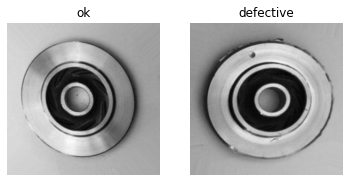

In [6]:
dir1 = '/content/drive/MyDrive/archive/casting_data/casting_data/train/ok_front/'
dir2 = '/content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/'

img1 = plt.imread(dir1+random.choice(os.listdir(dir1)))
img2 = plt.imread(dir2+random.choice(os.listdir(dir2)))

fig, ax = plt.subplots(1,2)

ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('ok')

ax[1].imshow(img2)
ax[1].axis('off');
ax[1].set_title('defective');

In [7]:
# image data from test data 

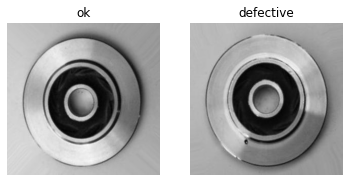

In [8]:
dir1 = '/content/drive/MyDrive/archive/casting_data/casting_data/test/ok_front/'
dir2 = '/content/drive/MyDrive/archive/casting_data/casting_data/test/def_front/'

img1 = plt.imread(dir1+random.choice(os.listdir(dir1)))
img2 = plt.imread(dir2+random.choice(os.listdir(dir2)))

fig, ax = plt.subplots(1,2)

ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('ok')

ax[1].imshow(img2)
ax[1].axis('off');
ax[1].set_title('defective');

In [ ]:
# checking the no. of images in training and testing images

In [40]:
print("Class ok_front train count:",len(os.listdir('/content/drive/MyDrive/archive/casting_data/casting_data/train/ok_front')))
print("Class def_front train count:",len(os.listdir('/content/drive/MyDrive/archive/casting_data/casting_data/train/def_front')) )

print("Class def_front test count:",len(os.listdir('/content/drive/MyDrive/archive/casting_data/casting_data/test/def_front')))
print("Class ok_front test count:",len(os.listdir('/content/drive/MyDrive/archive/casting_data/casting_data/test/ok_front')))

Class ok_front train count: 2875
Class def_front train count: 3758
Class def_front test count: 453
Class ok_front test count: 262


In [9]:
image_shape = (300,300,1)
batch_size = 32

In [10]:
# Data prepration

In [11]:
# rescalaing the image by normalizing it
image_gen = ImageDataGenerator(rescale=1/255)

In [12]:
train_set = image_gen.flow_from_directory(train_path,
                                          target_size=image_shape[:2],
                                          color_mode='grayscale',
                                          batch_size=batch_size,
                                          class_mode='binary',
                                          shuffle=True)

Found 6633 images belonging to 2 classes.


In [13]:
test_set = image_gen.flow_from_directory(test_path,
                                         target_size=image_shape[:2],
                                         color_mode ='grayscale',
                                         batch_size = batch_size,
                                         class_mode = 'binary',
                                         shuffle = False)

Found 715 images belonging to 2 classes.


In [14]:
  train_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [15]:
test_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [16]:
# Convolutional model

In [20]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(224))
model.add(Activation('relu'))

# last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 8)       80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 8)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 16)      1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19600)            

In [22]:
results = model.fit_generator(train_set,epochs=10,validation_data=test_set,callbacks=[early_stop])

Epoch 1/10
208/208 [==============================] - 3269s 16s/step - loss: 0.5404 - accuracy: 0.7008 - val_loss: 0.1989 - val_accuracy: 0.9161
Epoch 2/10
208/208 [==============================] - 262s 1s/step - loss: 0.2131 - accuracy: 0.9145 - val_loss: 0.0690 - val_accuracy: 0.9888
Epoch 3/10
208/208 [==============================] - 262s 1s/step - loss: 0.1074 - accuracy: 0.9675 - val_loss: 0.0761 - val_accuracy: 0.9818
Epoch 4/10
208/208 [==============================] - 263s 1s/step - loss: 0.0664 - accuracy: 0.9835 - val_loss: 0.0365 - val_accuracy: 0.9874
Epoch 5/10
208/208 [==============================] - 263s 1s/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 6/10
208/208 [==============================] - 262s 1s/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.0160 - val_accuracy: 0.9958
Epoch 7/10
208/208 [==============================] - 262s 1s/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0173 - val_accuracy: 0.99

In [41]:
model.save('/content/drive/MyDrive/archive/inspection_of_casting_products.h5')

In [24]:
losses = pd.DataFrame(model.history.history)


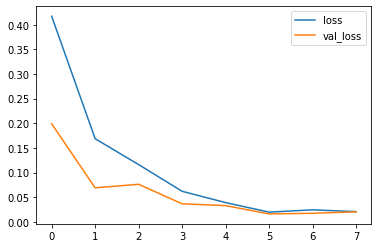

In [25]:
losses[['loss','val_loss']].plot()


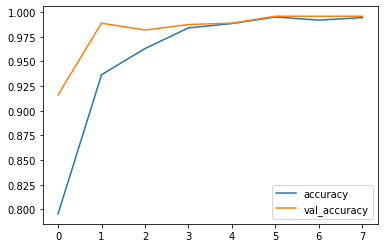

In [26]:
losses[['accuracy','val_accuracy']].plot()


In [27]:
pred_probability = model.predict_generator(test_set)


In [24]:
test_set.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
predictions = pred_probability > 0.5
#if model predict greater than 0.5 it conveted to 1 means ok_front

In [29]:
print(classification_report(test_set.classes,predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       453
           1       1.00      0.99      0.99       262

    accuracy                           1.00       715
   macro avg       1.00      0.99      1.00       715
weighted avg       1.00      1.00      1.00       715



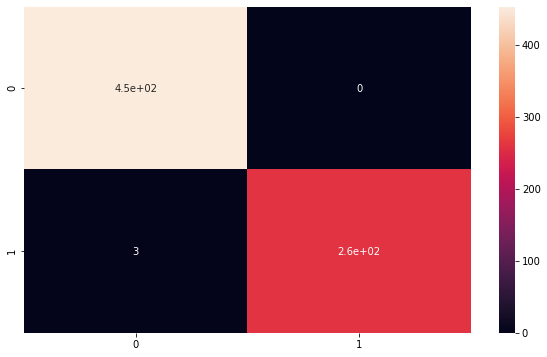

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

In [31]:
#we already have string of test path
test_path

'/content/drive/MyDrive/archive/casting_data/casting_data/test/'

In [ ]:
# checking for the test images

In [32]:
img = cv2.imread(test_path+'ok_front/cast_ok_0_1020.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

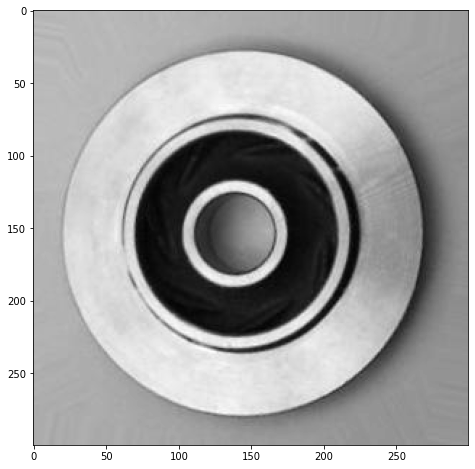

In [33]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

In [ ]:
# predicting the image from test data

ok_front


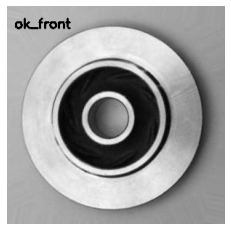

In [34]:
prediction = model.predict(img.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

In [35]:
img1 = cv2.imread(test_path+'def_front/cast_def_0_1134.jpeg',0)
img1 = img1/255
pred_img1 =img1.copy()

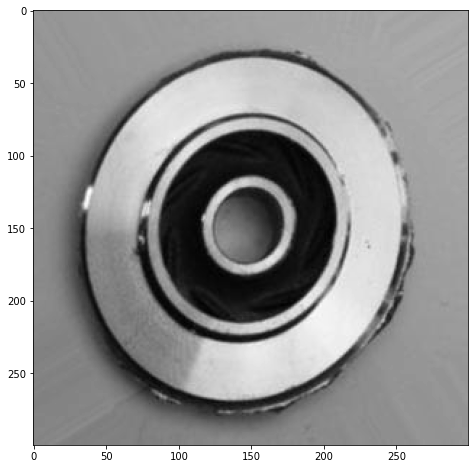

In [36]:
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

In [37]:
model.predict_proba(img.reshape(1,300,300,1))


array([[0.99997956]], dtype=float32)

def_front


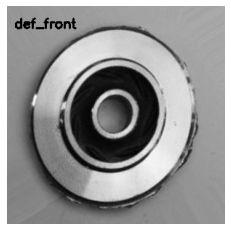

In [38]:
prediction = model.predict(img1.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

In [51]:
# using web cam for image classification

In [113]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


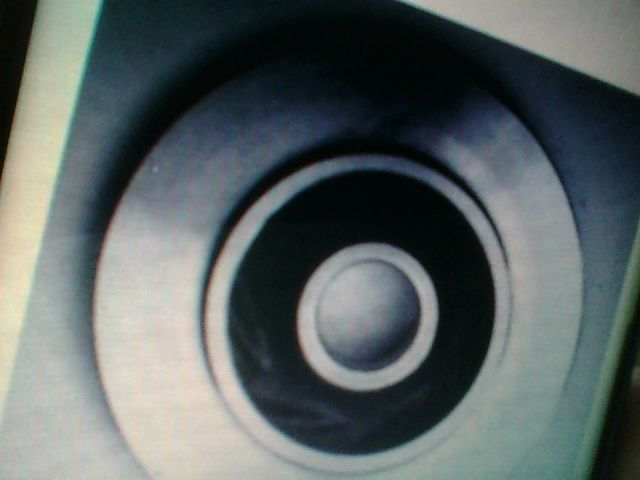

In [114]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# this code will predict the image we captured from web cam 

In [1]:
from PIL import Image
user_test = filename
col = Image.open(user_test)

img_array = cv2.imread('/content/photo.jpg',cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array,(300,300))
img_array = np.expand_dims(img_array,axis = 0)
img_array = np.expand_dims(img_array,axis = 3)
print(img_array.shape)

predicted = model.predict(img_array)
print(predicted)
a = predicted[0][0]

print('the predicted value is ', (predicted[0]))